In [17]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import np_utils
import h5py
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import time
import matplotlib.pyplot as plt
import cv2
from PIL import Image,ImageOps

In [18]:
print(keras.__version__)

2.6.0


In [19]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

np.random.seed(1)

model = Sequential()
model.add(Conv2D(16, (3, 3), 
          input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.25))                                 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                             
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer= "adam", loss='mse', metrics=["accuracy"])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=100, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
model.save_weights('model.hdf5')
model.save("model.h5")

Epoch 1/10
600/600 [==============================] - 8s 12ms/step - loss: 0.0290 - accuracy: 0.7903 - val_loss: 0.0201 - val_accuracy: 0.8597
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0187 - accuracy: 0.8695 - val_loss: 0.0165 - val_accuracy: 0.8837
Epoch 3/10
600/600 [==============================] - 6s 11ms/step - loss: 0.0161 - accuracy: 0.8889 - val_loss: 0.0151 - val_accuracy: 0.8965
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0146 - accuracy: 0.9003 - val_loss: 0.0141 - val_accuracy: 0.9038
Epoch 5/10
600/600 [==============================] - 6s 11ms/step - loss: 0.0136 - accuracy: 0.9071 - val_loss: 0.0135 - val_accuracy: 0.9058
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0126 - accuracy: 0.9145 - val_loss: 0.0137 - val_accuracy: 0.9050
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0120 - accuracy: 0.9189 - val_loss: 0.0125 - val_accuracy: 0.9156

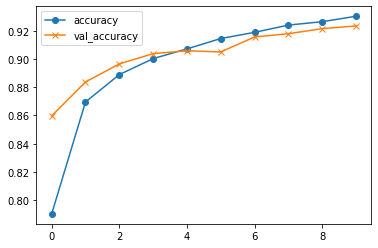

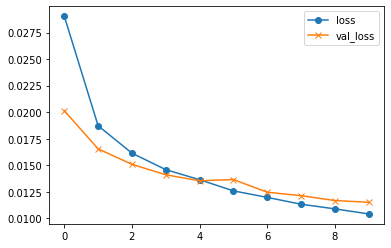

In [20]:
def model_plot():
  plt.plot(history.history["accuracy"],label="accuracy",ls="-",marker="o")
  plt.plot(history.history["val_accuracy"],label="val_accuracy",ls="-",marker="x")
  plt.ylabel=("accuracy")
  plt.xlabel=("epoch")
  plt.legend(loc="best")
  plt.show()
  plt.plot(history.history["loss"],label="loss",ls="-",marker="o")
  plt.plot(history.history["val_loss"],label="val_loss",ls="-",marker="x")
  plt.ylabel=("accuracy")
  plt.xlabel=("epoch")
  plt.legend(loc="best")
  plt.show()
  return

model_plot()

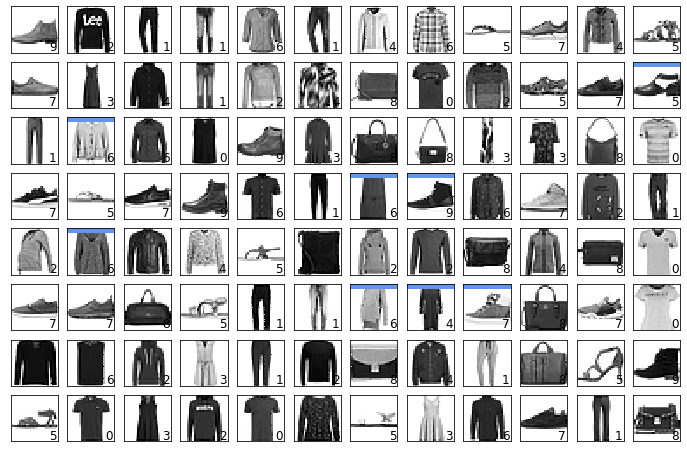

In [21]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)  
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        #plt.pcolor(x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

(1200, 1000, 3)
(28, 28, 3)
(28, 28)
(28, 28)
(28, 28)


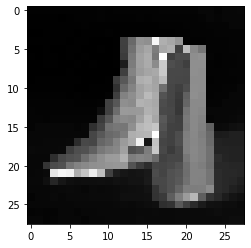

In [23]:
img = cv2.imread("boot2.jpg")
print(img.shape)
img = cv2.resize(img,(28,28))
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
invgray = cv2.bitwise_not(gray)
print(invgray.shape)
cv2.imwrite("cv2_boot2.png", invgray)

img = cv2.imread("cv2_boot2.png",cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray',  interpolation='nearest')
plt.show()

None (750, 1000) L
None (28, 28) L
None (28, 28) L
PNG (28, 28) L


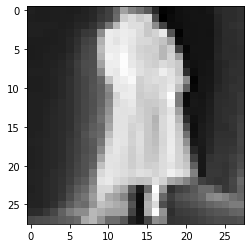

In [24]:
image = Image.open("coat1.jpg").convert('L') 
print(image.format, image.size, image.mode)
image = image.resize((28,28), Image.LANCZOS)
print(image.format, image.size, image.mode)
im_invert = ImageOps.invert(image)
print(im_invert.format, im_invert.size, im_invert.mode)
im_invert.save("pil_coat1.png")

image = Image.open("pil_coat1.png")
print(image.format, image.size, image.mode)
plt.imshow(image, cmap='gray',  interpolation='nearest')
plt.show()

In [25]:
data_lst= ["flipflop2.jpg", "sneaker1.jpg", "coat1.jpg", "bag2.jpg","flipflop1.jpg","zubon.jpg",
            "bag1.jpg","coat2.jpg","sneaker2.jpg","boot2.jpg"]
png_data_lst = []
n = len(data_lst)
wd_lst = []
for i in range(n):
    img = cv2.imread(data_lst[i], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(28,28))
    invgray = cv2.bitwise_not(img)
    wd_lst = data_lst[i].split(".")
    cv2.imwrite("png_" + wd_lst[0] + ".png", invgray)
    png_data_lst.append("png_"+ wd_lst[0] + ".png")
    
png_data = np.array(png_data_lst)
np.save("png_datafile.npy", png_data)

['png_flipflop2.png' 'png_sneaker1.png' 'png_coat1.png' 'png_bag2.png'
 'png_flipflop1.png' 'png_zubon.png' 'png_bag1.png' 'png_coat2.png'
 'png_sneaker2.png' 'png_boot2.png']


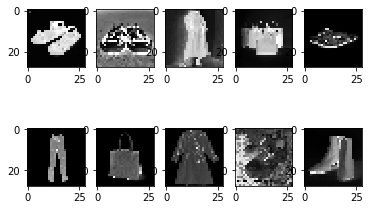

In [26]:
png_data_lst = np.load("png_datafile.npy")
print(png_data_lst)
n = len(png_data_lst)

for i in range(n):
    img = cv2.imread(png_data_lst[i], cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 5, i+1)
    im_list = np.array(img)
    plt.imshow(im_list, cmap='gray',  interpolation='nearest')
plt.show()

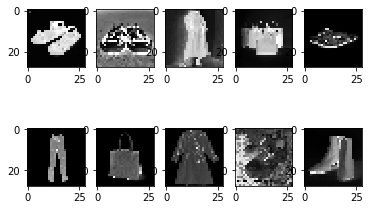

['バッグ', 'サンダル', 'ズボン', 'バッグ', 'バッグ', 'ズボン', 'バッグ', 'シャツ', 'バッグ', 'コート']
['サンダル', 'スニーカー', 'コート', 'バッグ', 'サンダル', 'ズボン', 'バッグ', 'コート', 'スニーカー', 'アンクルブーツ']


In [27]:
label_lst = ["Ｔシャツ／トップス", "ズボン", "プルオーバー", "ドレス", "コート", "サンダル", "シャツ", "スニーカー", 
             "バッグ", "アンクルブーツ"]

model = tf.keras.models.load_model("model.h5", compile=False)

png_data_lst = np.load("png_datafile.npy")
n = len(png_data_lst)

pr_pred = []
pr_y = ["サンダル","スニーカー","コート","バッグ","サンダル","ズボン","バッグ","コート","スニーカー","アンクルブーツ"]

for i in range(n):
    img = cv2.imread(png_data_lst[i], cv2.IMREAD_GRAYSCALE)
    data_arr = img.reshape(-1,28,28,1)
    pred = np.argmax(model.predict(data_arr))            
    pr_pred.append(label_lst[pred])  
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray',  interpolation='nearest')
    
plt.show()

print(pr_pred)
print(pr_y)

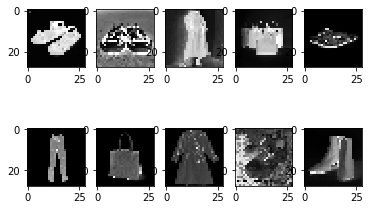

1 バッグ
2 サンダル
3 ズボン
4 バッグ
5 バッグ
6 ズボン
7 バッグ
8 シャツ
9 バッグ
10 コート
1 サンダル
2 スニーカー
3 コート
4 バッグ
5 サンダル
6 ズボン
7 バッグ
8 コート
9 スニーカー
10 アンクルブーツ


In [28]:
label_lst = ["Ｔシャツ／トップス", "ズボン", "プルオーバー", "ドレス", "コート", "サンダル", "シャツ", "スニーカー", 
             "バッグ", "アンクルブーツ"]


model = tf.keras.models.load_model("model.h5", compile=False)

png_data_lst = np.load("png_datafile.npy")
n = len(png_data_lst)

pr_pred = []
pr_y = ["サンダル","スニーカー","コート","バッグ","サンダル","ズボン","バッグ","コート","スニーカー","アンクルブーツ"]

for i in range(n):
    image = Image.open(png_data_lst[i]).convert('L')
    in_data = np.array(image)
    data_arr = in_data.reshape(-1,28,28,1)
    
    pred = np.argmax(model.predict(data_arr))            
    pr_pred.append(label_lst[pred])  

    plt.subplot(2, 5, i+1)
    plt.imshow(in_data, cmap='gray',  interpolation='nearest')
    
plt.show()


for i, name in enumerate(pr_pred, 1):
    print(i, name)

for i, name in enumerate(pr_y, 1):
    print(i, name)

In [101]:
X_train_84 = []
#resize
img_rows = 84
img_cols = 84

for i in range(60000):
  rs_data = cv2.resize(x_train[i], (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
  X_train_84.append(rs_data)

Epoch 1/3
600/600 [==============================] - 39s 64ms/step - loss: 0.0228 - accuracy: 0.8401 - val_loss: 0.0167 - val_accuracy: 0.8845
Epoch 2/3
600/600 [==============================] - 38s 63ms/step - loss: 0.0149 - accuracy: 0.8988 - val_loss: 0.0140 - val_accuracy: 0.9029
Epoch 3/3
600/600 [==============================] - 38s 64ms/step - loss: 0.0124 - accuracy: 0.9161 - val_loss: 0.0126 - val_accuracy: 0.9126
Test loss: 0.012585672549903393
Test accuracy: 0.9125999808311462
Computation time:145.915 sec


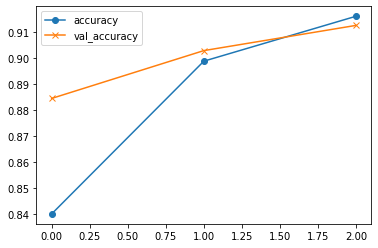

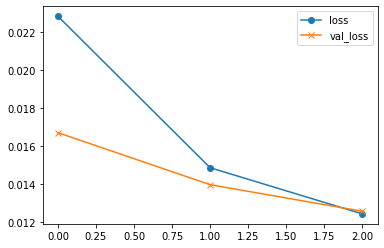

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

X_train_n = []
X_test_n = []
img_rows = 84
img_cols = 84

for i in range(60000):
    rs_data = cv2.resize(x_train[i], (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
    X_train_n.append(rs_data)

for i in range(10000):
    rs_data = cv2.resize(x_test[i], (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
    X_test_n.append(rs_data)

x_train = np.array(X_train_n)
x_train = x_train.reshape(60000, img_rows, img_cols, 1)
x_test = np.array(X_test_n)
x_test = x_test.reshape(10000, img_rows, img_cols, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")   
x_train /= 255
x_test /= 255
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

np.random.seed(1)

model = Sequential()
model.add(Conv2D(16, (3, 3), 
          input_shape=(img_rows, img_cols, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.25))                                 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer= "adam", loss='mse', metrics=["accuracy"])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=100, epochs=3,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
model.save_weights('resize84.hdf5')
model.save("resize84.h5")

model_plot()

In [30]:
data_lst= ["flipflop2.jpg", "sneaker1.jpg", "coat1.jpg", "bag2.jpg","flipflop1.jpg","zubon.jpg",
            "bag1.jpg","coat2.jpg","sneaker2.jpg","boot2.jpg"]
png_data_84_lst = []
n = len(data_lst)
wd_lst = []
for i in range(n):
    img = cv2.imread(data_lst[i], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(84,84))
    invgray = cv2.bitwise_not(img)
    wd_lst = data_lst[i].split(".")
    cv2.imwrite("png84_" + wd_lst[0] + ".png", invgray)
    png_data_84_lst.append("png84_"+ wd_lst[0] + ".png")
    
png_data = np.array(png_data_84_lst)
np.save("png84_datafile.npy", png_data)

['png84_flipflop2.png' 'png84_sneaker1.png' 'png84_coat1.png'
 'png84_bag2.png' 'png84_flipflop1.png' 'png84_zubon.png' 'png84_bag1.png'
 'png84_coat2.png' 'png84_sneaker2.png' 'png84_boot2.png']


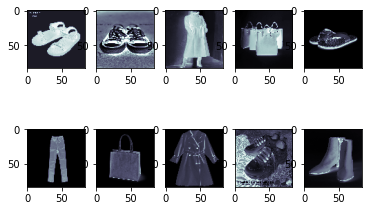

In [31]:
png_data_lst = np.load("png84_datafile.npy")
print(png_data_lst)
n = len(png_data_lst)

for i in range(n):
    img = cv2.imread(png_data_lst[i], cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 5, i+1)
    im_list = np.array(img)
    plt.imshow(im_list, cmap=plt.cm.bone)
plt.show()

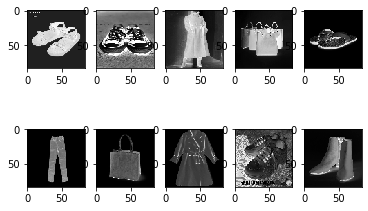

1 バッグ
2 バッグ
3 コート
4 バッグ
5 サンダル
6 ズボン
7 バッグ
8 シャツ
9 バッグ
10 サンダル
1 サンダル
2 スニーカー
3 コート
4 バッグ
5 サンダル
6 ズボン
7 バッグ
8 コート
9 スニーカー
10 アンクルブーツ


In [32]:
label_lst = ["Ｔシャツ／トップス", "ズボン", "プルオーバー", "ドレス", "コート", "サンダル", "シャツ", "スニーカー", 
             "バッグ", "アンクルブーツ"]


model = tf.keras.models.load_model("resize84.h5", compile=False)

png_data_lst = np.load("png84_datafile.npy")
n = len(png_data_lst)

pr_pred = []
pr_y = ["サンダル","スニーカー","コート","バッグ","サンダル","ズボン","バッグ","コート","スニーカー","アンクルブーツ"]

for i in range(n):
    img = cv2.imread(png_data_lst[i], cv2.IMREAD_GRAYSCALE)
    
    data_arr = img.reshape(-1,84,84,1)
    pred = np.argmax(model.predict(data_arr))            
    pr_pred.append(label_lst[pred])  

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray',  interpolation='nearest')
    
plt.show()

for i, name in enumerate(pr_pred, 1):
    print(i, name)

for i, name in enumerate(pr_y, 1):
    print(i, name)